# Task#3 by Swathi Singh
## Data Science and business analytics intern at 'The Sparks foundation'.

# Exploratory Data Analysis - Retail

Dataset : https://bit.ly/3i4rbWl

**Problem Statement**

Our goal is to Perform Exploratory Data Analysis on the Sample SuperStore dataset and we have to find out the weak areas where we can work to make more profit.

And also all other business problems we can derive by exploring the data?



TODO - Talk about EDA

TODO - Talk about the dataset (source, what it contains, how it will be useful)
    
### Importing all libraries required in this notebook
### Importing Dataset
### Data preparation and cleaning
### Exploratory Analysis and Visualisation
### Ask & answer questions
### Summary and Conclusion

## #Importing all libraries required in this notebook

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## # Importing Dataset

In [ ]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# #Data preparation and cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.shape

(9994, 13)

In [ ]:
missing_values = df.isna().sum()
print(missing_values)


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values found in our data

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In United States, A Superstore suplies 3 Categories - Furniture, Office Supplies and Technology consists of 17 subcategories in 4 Regions where items are shipped in 531 cities of 49 States to 3 Segments - 'Consumer', 'Corporate' and 'Home Office' with Shipping facilities of 'Second Class','Standard Class', 'First Class', 'Same Day'.

As we know, Superstore is based in United States and Postal Code is not much use for us. It's better to remove the country column which make no impact on our data.

In [ ]:
df.drop(['Country','Postal Code'],axis=1,inplace= True)

## **Checking the Outliers**
Outliers present in a classification or regression dataset can lead to lower predictive modeling performance.

A boxplot is a standardized way of displaying the distribution of data based on its five-number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Boxplots can tell you about your outliers and their values, if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

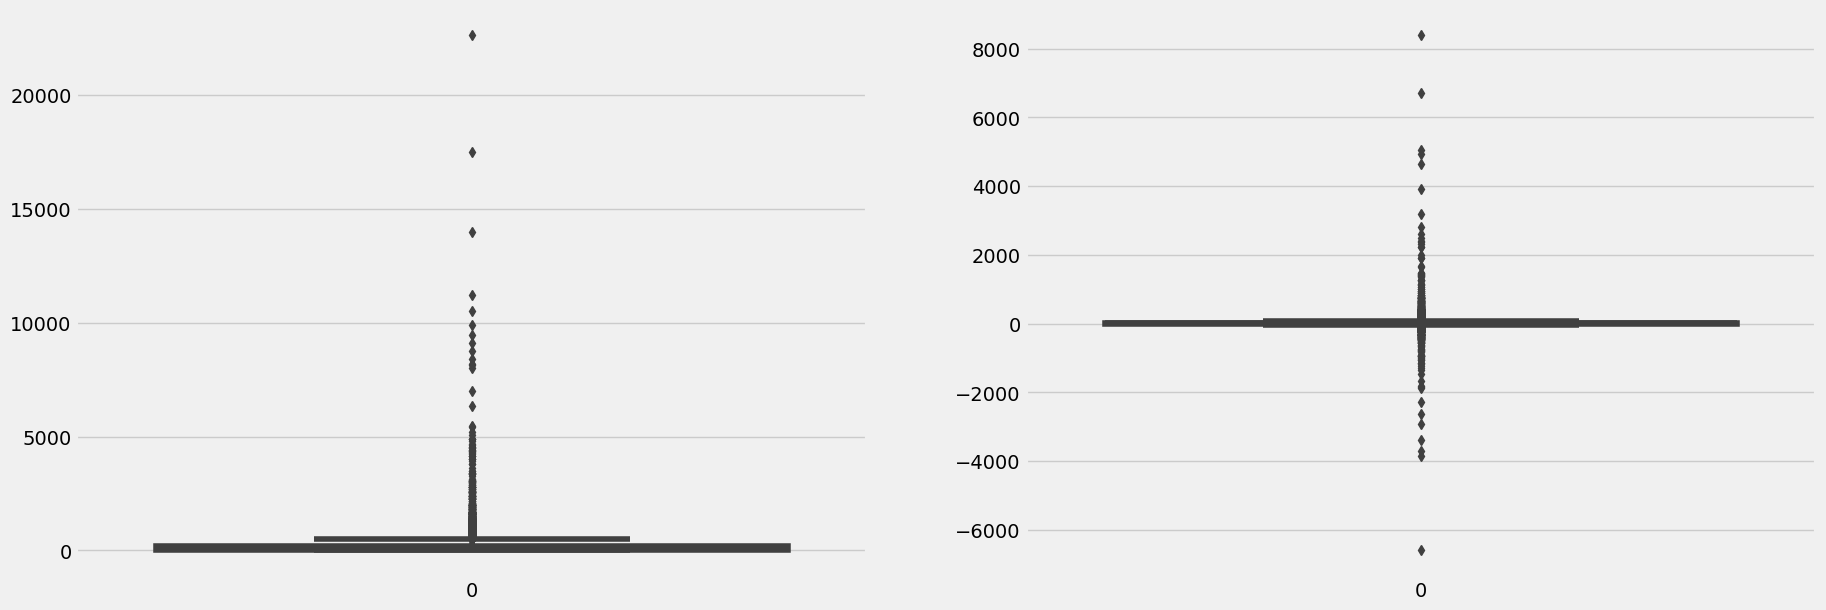

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(df['Sales'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Profit'])

plt.gcf().set_size_inches(20, 7)

Detecting Outliers present in the 'Sales' and 'Profit' columns assuming normal distribution.

In [ ]:
sales_mean, sales_std = df['Sales'].mean(), df['Sales'].std()
# identify outliers
cut_off = sales_std * 3
lower, upper = sales_mean - cut_off, sales_mean + cut_off
# identify outliers
outliers = [x for x in df['Sales'] if x < lower or x > upper]
print('Identified outliers in Sales: %d' % len(outliers))

Identified outliers in Sales: 127


In [ ]:
profit_mean, profit_std = df['Profit'].mean(), df['Profit'].std()
# identify outliers
cut_off = profit_std * 3
lower, upper = profit_mean - cut_off, profit_mean + cut_off
# identify outliers
outliers = [x for x in df['Profit'] if x < lower or x > upper]
print('Identified outliers in Profit: %d' % len(outliers))

Identified outliers in Profit: 107


Similerly, Detecting Outliers present in the 'Quantity' and 'Discount' columns

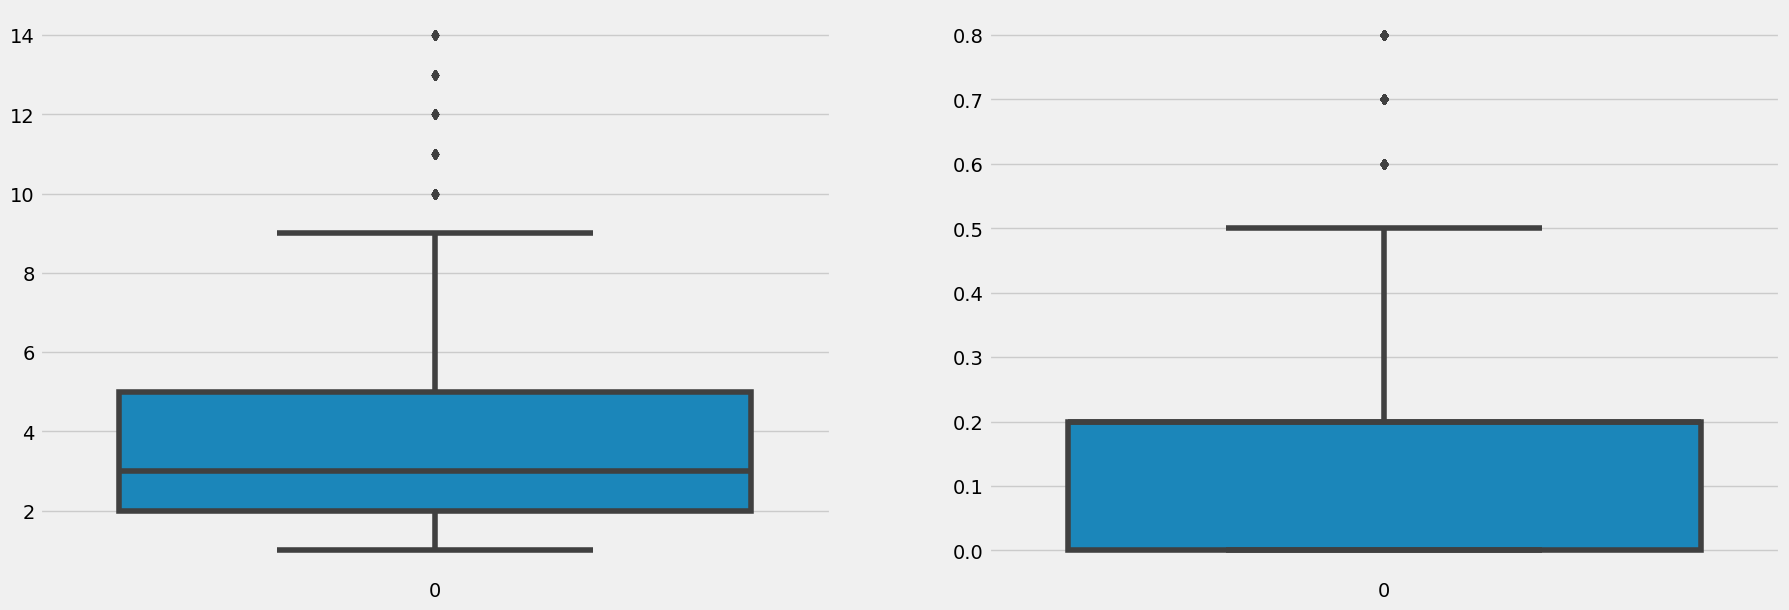

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(df['Quantity'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Discount'])

plt.gcf().set_size_inches(20, 7)

As, we have observed there are many outliers.

In [ ]:
discount_mean, discount_std = df['Discount'].mean(), df['Discount'].std()
# identify outliers
cut_off = discount_std * 3
lower, upper = discount_mean - cut_off, discount_mean + cut_off
# identify outliers
outliers = [x for x in df['Discount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 300


In [ ]:
Quantity_mean, Quantity_std = df['Quantity'].mean(), df['Quantity'].std()
# identify outliers
cut_off = Quantity_std * 3
lower, upper = Quantity_mean - cut_off, Quantity_mean + cut_off
# identify outliers
outliers = [x for x in df['Quantity'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 113


Indentifile Outliers in following Attributes:

*   Sales : 127
*   Profit : 107
*   Quantity : 113
*   Discount : 300

## Removing the Outliers
IQR Based filtering, for skewed features.

Treating outliers as a missing value: Byassuming outliers as the missing observations, treat them accordingly, i.e., same as missing values imputation.

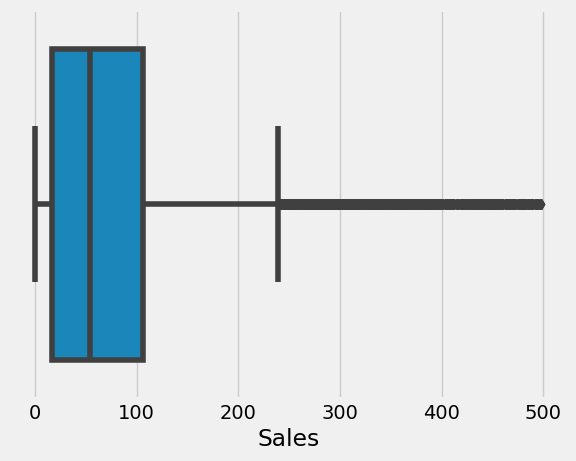

In [ ]:
for i in ['Sales']:
    q3, q1 = np.percentile(df.loc[: , i],[75,25])
    iqr = q3 - q1


    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)

    #Replacing the Outlier Values with Nan

    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

    df['Sales'].fillna(df['Sales'].mean(), inplace = True)
    sns.boxplot(x = df['Sales'])

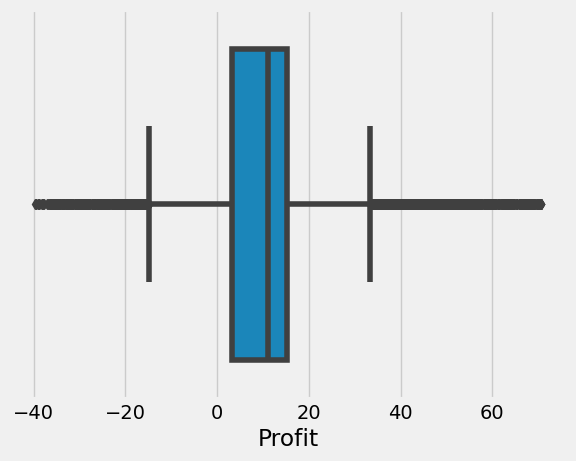

In [ ]:
for i in ['Profit']:
    q3, q1 = np.percentile(df.loc[: , i],[75,25])
    iqr = q3 - q1


    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)

    #Replacing the Outlier Values with Nan

    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

    df['Profit'].fillna(df['Profit'].mean(), inplace = True)
    sns.boxplot(x = df['Profit'])

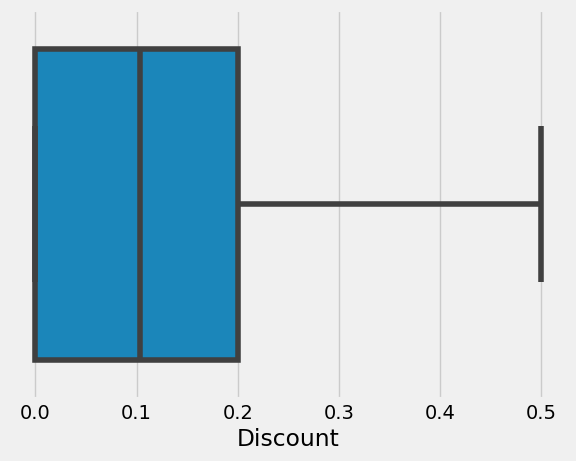

In [ ]:
for i in ['Discount']:
    q3, q1 = np.percentile(df.loc[: , i],[75,25])
    iqr = q3 - q1


    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)

    #Replacing the Outlier Values with Nan

    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

    df['Discount'].fillna(df['Discount'].mean(), inplace = True)
    sns.boxplot(x = df['Discount'])

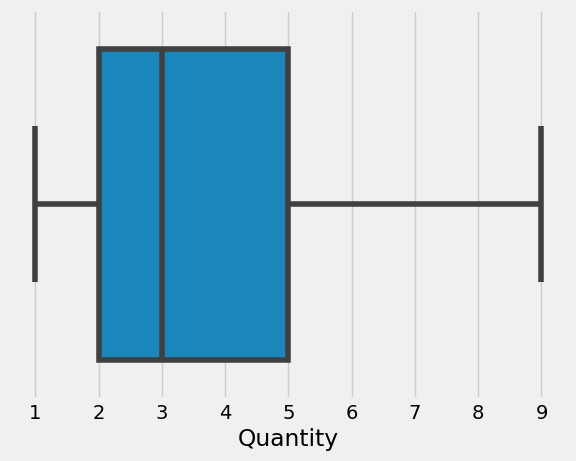

In [ ]:
for i in ['Quantity']:
    q3, q1 = np.percentile(df.loc[: , i],[75,25])
    iqr = q3 - q1


    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)

    #Replacing the Outlier Values with Nan

    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

    df['Quantity'].fillna(df['Quantity'].mean(), inplace = True)
    sns.boxplot(x = df['Quantity'])

We have successfully reomved the Outliers.

## Exploratory Analysis and Visualisation

###**Exploring the Unique values in categorical columns**

In [ ]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
corr = df.corr()
corr

<ipython-input-79-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<ipython-input-80-0ab79b8d60d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='rocket_r',annot=True)


<Axes: >

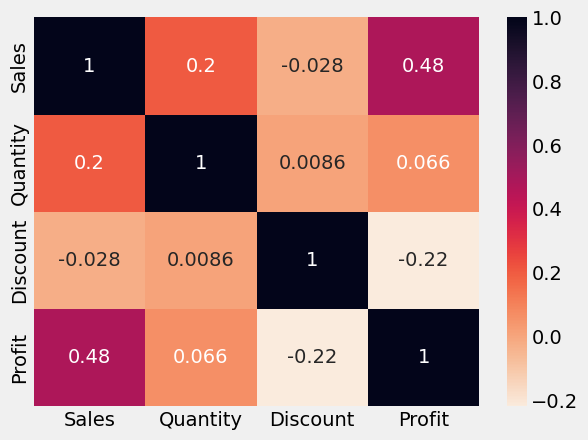

In [ ]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

Heatmap elaborates:

Sales and Profit are positively related (0.30)
Discount and Profit are negatively related (-0.22)

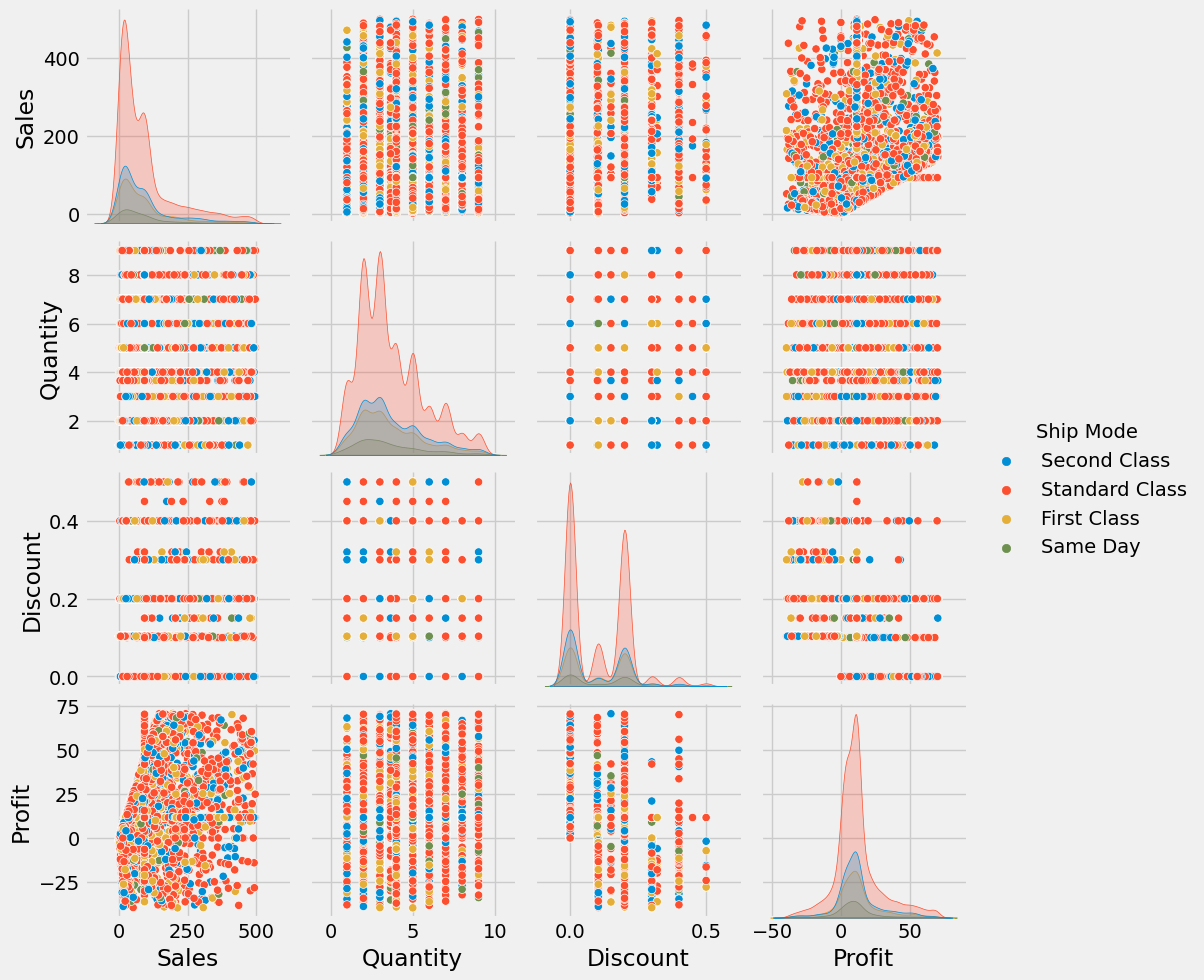

In [ ]:
sns.pairplot(df,hue='Ship Mode')

**Conclusion : 'Standard Shipping' mode is highly preferred whersas 'Same Day' is least**

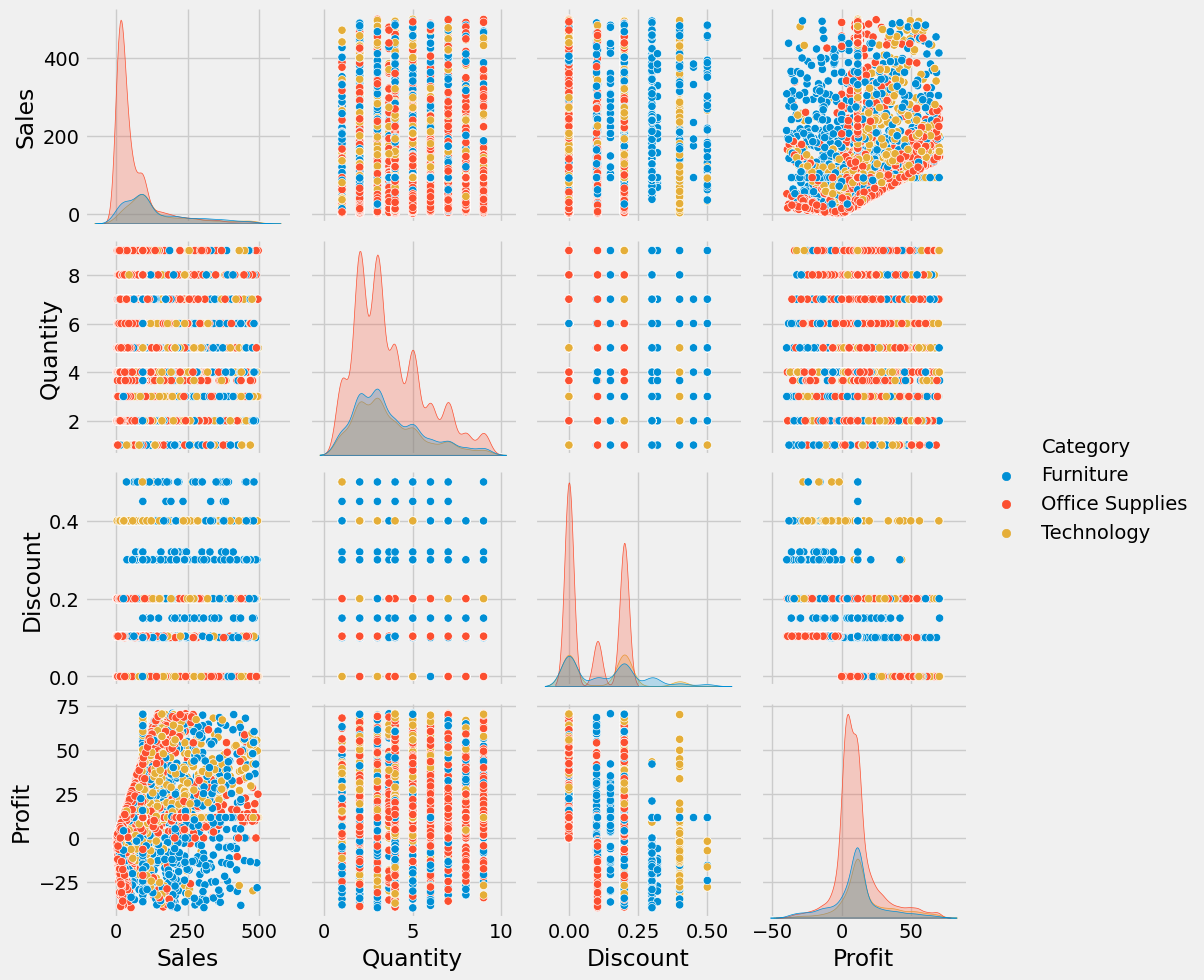

In [ ]:
sns.pairplot(df,hue='Category')

**Conclusion : Large no. of the Categories belong to Office Supplies whereas comparatively very less no. of Categories belongs to Furniture and Technology**

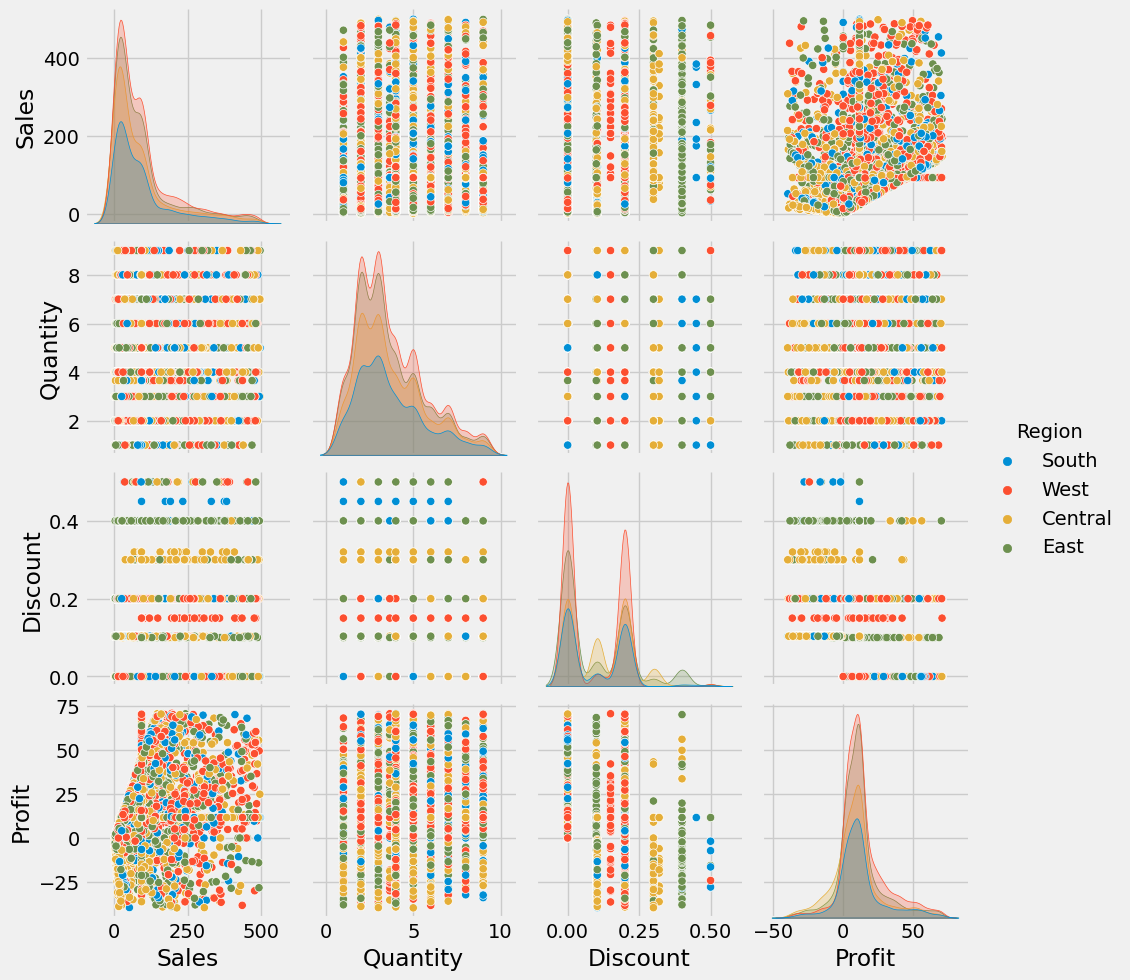

In [ ]:
sns.pairplot(df,hue='Region')


**Conclusion: Maximum no. is from West region followed by East, Central, and then South.**

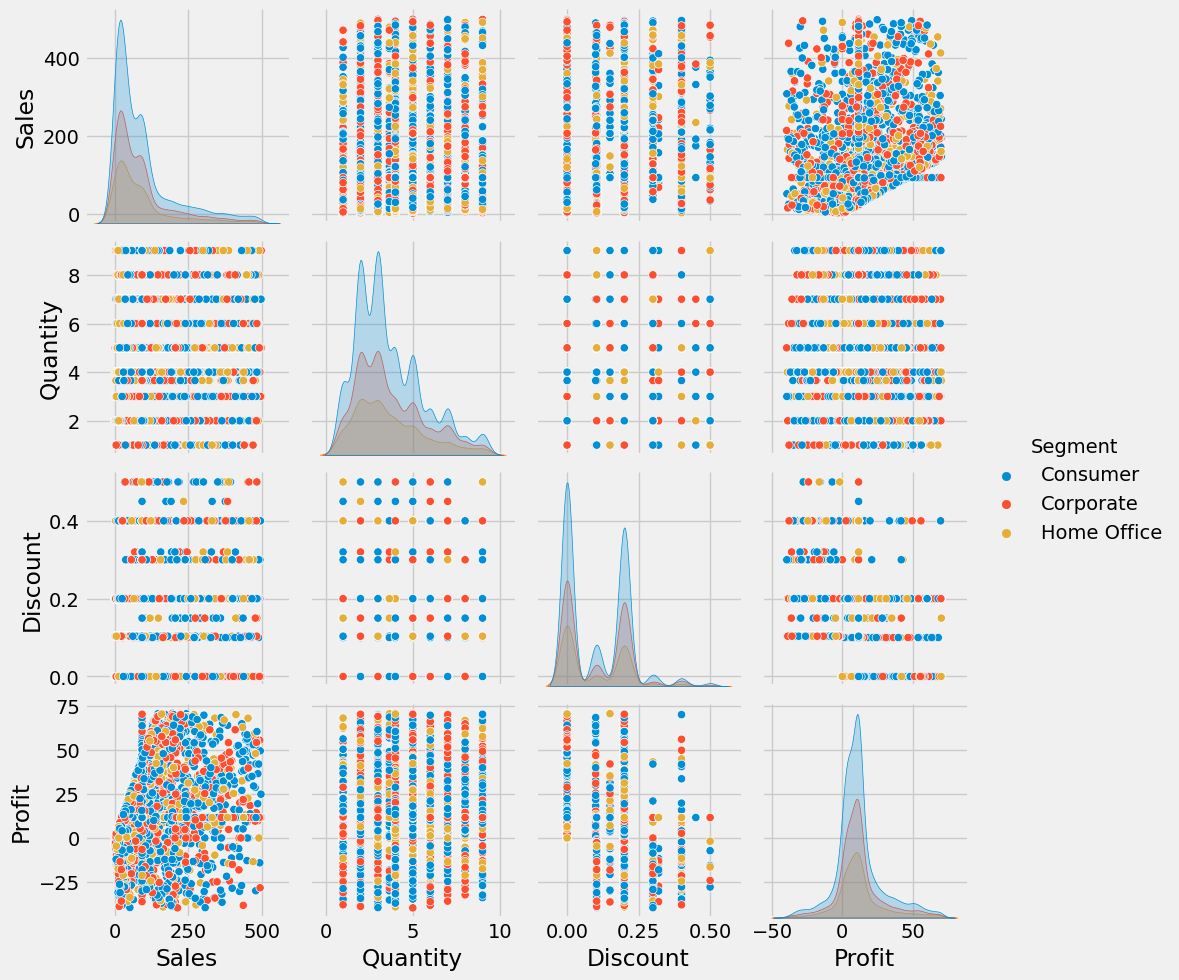

In [ ]:
sns.pairplot(df,hue='Segment')

**Conclusion : most of people belong to consumer class whereas remaining people belong to Home Office & Corporate both**

In [ ]:
highprofit = df.groupby(['City','Category']).mean(numeric_only='True').sort_values('Profit', ascending = False)[['Sales', 'Profit']]
highprofit

,,Sales,Profit
City,Category,,
Las Vegas,Technology,92.864853,70.1955
Orland Park,Technology,339.960000,67.9920
Rome,Technology,269.980000,67.4950
Gaithersburg,Technology,231.980000,67.2742
Mentor,Technology,239.976000,65.9934
...,...,...,...
San Angelo,Office Supplies,11.648000,-30.8672
Allen,Furniture,244.006000,-31.3722
Commerce City,Office Supplies,146.352000,-32.9292


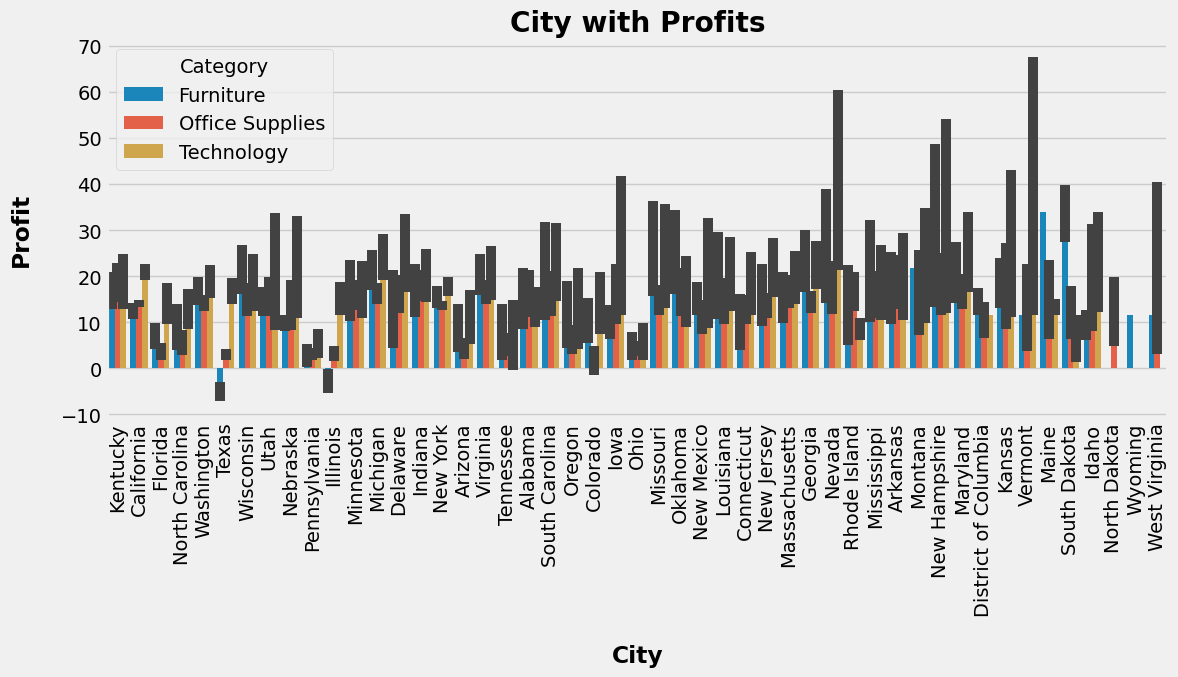

In [ ]:
txt = {'weight':'bold'}
sns.barplot(x = df['State'], y= df['Profit'], hue = df['Category'])
plt.title("City with Profits", fontdict = txt)
plt.xticks(rotation = 90)
plt.xlabel('City', fontdict = txt, labelpad = 20)
plt.ylabel('Profit', fontdict = txt, labelpad = 20)

plt.gcf().set_size_inches(12, 7)
plt.tight_layout()

This graph elaborates:

Vermont, Nevada & New Hamsphire has the highest Profit(40-60%)in Technology Category moderate in Office Supplies and Furniture
Texas and Chicago both Cities are in loss

In [ ]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = df.groupby(['Region','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
Region,,,,,,
Central,366,321,205,200,210,176
East,440,378,283,272,242,228
South,246,221,165,140,128,142
West,471,450,304,277,266,250


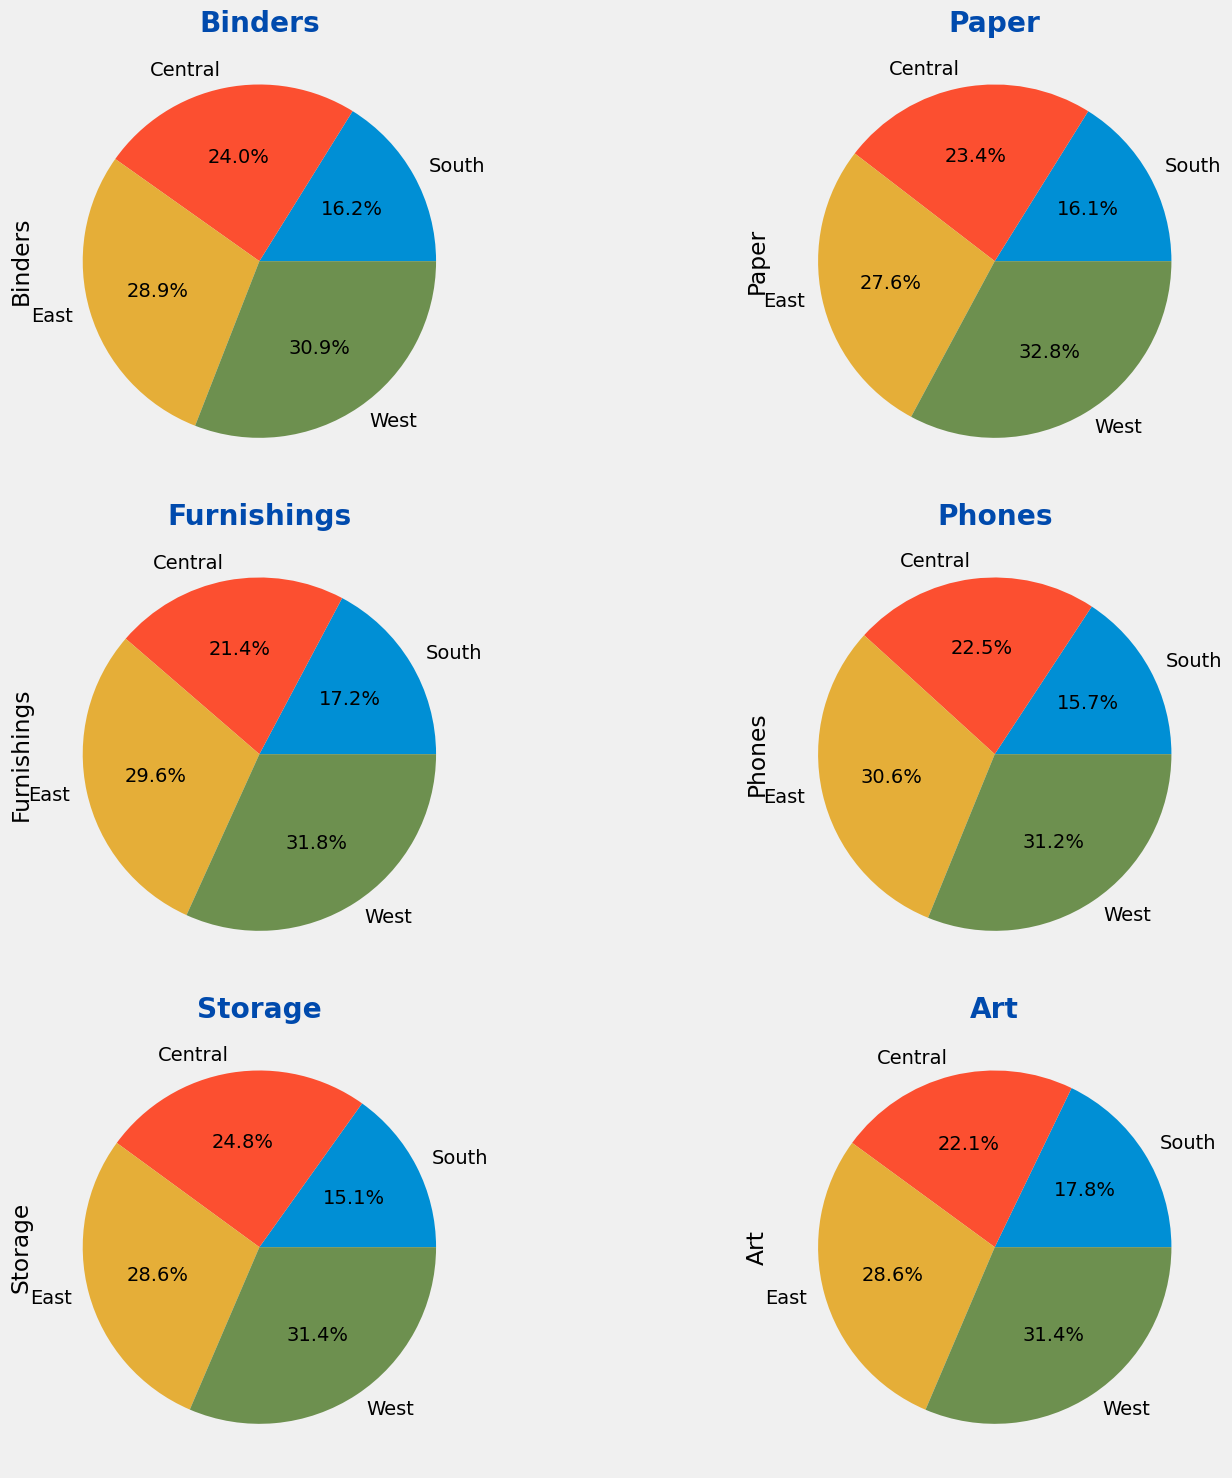

In [ ]:
plt.style.use('fivethirtyeight')
col_number = 2
row_number = 3
txt = {'weight' : 'bold'}
fig, axes = plt.subplots(row_number, col_number)

for i, (label, col) in enumerate(region_subCategories_df.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)
    col.plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title(label, color='#004aad', fontdict=txt)

plt.gcf().set_size_inches(18, 15)
plt.tight_layout()
plt.show()

In [ ]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = df.groupby(['State','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df.head()

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
State,,,,,,
Alabama,10.0,8.0,3.0,6.0,3.0,7.0
Arizona,35.0,31.0,21.0,23.0,21.0,14.0
Arkansas,10.0,12.0,5.0,4.0,2.0,6.0
California,276.0,289.0,191.0,172.0,160.0,165.0
Colorado,28.0,19.0,24.0,16.0,13.0,11.0


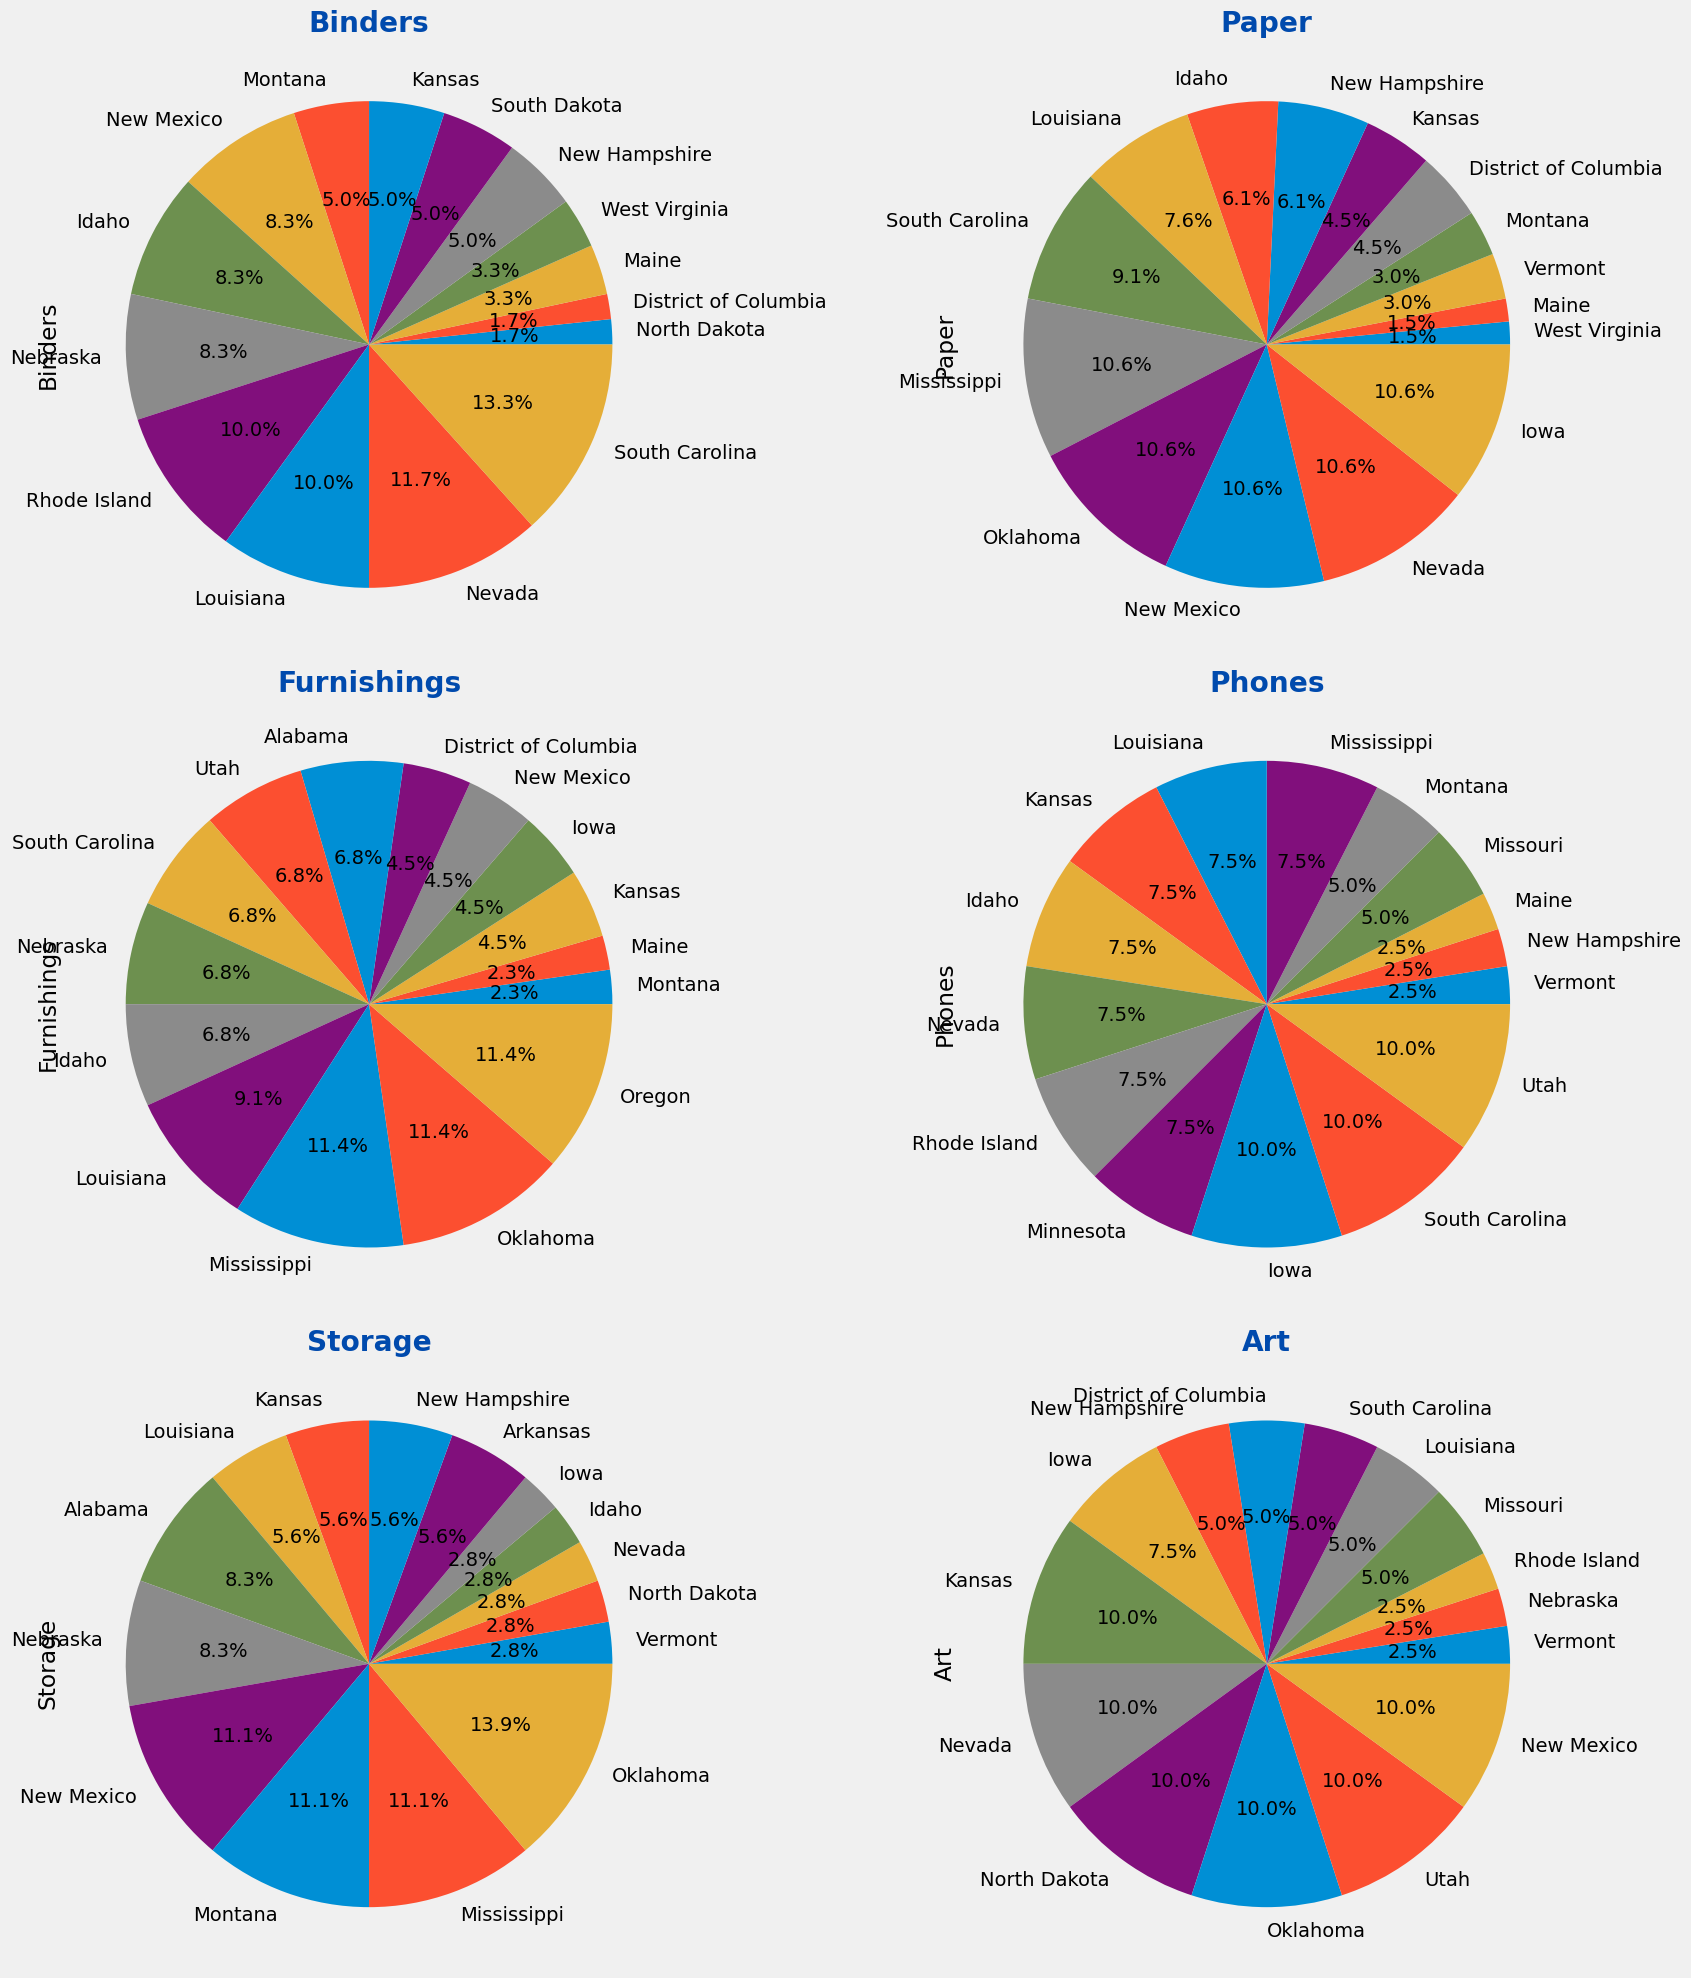

In [ ]:

plt.style.use('fivethirtyeight')

col_number = 2
row_number = 3
txt = {'weight': 'bold'}

fig, axes = plt.subplots(row_number, col_number)

for i, (label, col) in enumerate(region_subCategories_df.items()):
    ax = axes[int(i / col_number), i % col_number]

    # Limit the number of categories to 15 for better readability
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title(label, color='#004aad', fontdict=txt)

plt.gcf().set_size_inches(18, 20)
plt.tight_layout()
plt.show()


# #Summary


1. **Profitability Analysis:**
   - Profits are negatively impacted when discounts exceed 30%, while profits are positive when discounts are below 30%.

2. **Product Sales Strategy:**
   - To enhance profitability, we should reduce the emphasis on furniture sales and increase our focus on office supplies and technology, which yield higher profits relative to sales.

3. **Sub-category Optimization:**
   - We are experiencing significant losses from table sales, indicating a need to minimize their promotion and sales efforts.

4. **Regional Sales Enhancement:**
   - To boost overall sales and profitability, we should consider offering increased incentives, such as discounts, in the Southern and Central regions.

5. **Market Expansion Focus:**
   - Given our highest sales in California, we should target Texas and New York, where there is a significant potential customer base, to drive increased profits.

6. **Segment Diversification:**
   - While the consumer segment accounts for the highest purchases, we should also prioritize efforts to grow our sales and profits in the corporate and home office segments.

7. **Underserved Markets:**
   - States like North Dakota, Wyoming, and West Virginia have shown minimal or no sales; hence, we need to allocate resources to these regions to stimulate growth.

